# CUSTOMER CHURN ANALYSIS USING MACHINE LEARNING 

Churn =
1(yes) if customer cancelled service, 0(No) if not

AccountWeeks =
number of weeks customer has had active account

ContractRenewal =
1(yes) if customer recently renewed contract, 0(no) if not

DataPlan =
1(yes) if customer has data plan, 0(no) if not

DataUsage =
gigabytes of monthly data usage

CustServCalls =
number of calls into customer service

DayMins =
average daytime minutes per month

DayCalls =
average number of daytime calls

MonthlyCharge =
average monthly bill

OverageFee =
largest overage fee in last 12 months

# Data Exploration

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Data set/telecom_churn.csv")
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,No,128,Yes,Yes,2.70,1,265.1,110,89.0,9.87,10.0
1,No,107,Yes,Yes,3.70,1,161.6,123,82.0,9.78,13.7
2,No,137,Yes,No,0.00,0,243.4,114,52.0,6.06,12.2
3,No,84,No,No,0.00,2,299.4,71,57.0,3.10,6.6
4,No,75,No,No,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,No,192,Yes,Yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,No,68,Yes,No,0.34,3,231.1,57,56.4,7.67,9.6
3330,No,28,Yes,No,0.00,2,180.8,109,56.0,14.44,14.1
3331,No,184,No,No,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
data.dtypes

Churn               object
AccountWeeks         int64
ContractRenewal     object
DataPlan            object
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [4]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   object 
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   object 
 3   DataPlan         3333 non-null   object 
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 286.6+ KB


In [6]:
from sklearn import preprocessing as p
encoder=p.LabelEncoder()
encoder.fit(data["Churn"])
data["Churn"]=encoder.transform(data["Churn"])
data["Churn"]


0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int32

In [7]:
encoder.fit(data["ContractRenewal"])
data["ContractRenewal"]=encoder.transform(data["ContractRenewal"])
data["ContractRenewal"]

0       1
1       1
2       1
3       0
4       0
       ..
3328    1
3329    1
3330    1
3331    0
3332    1
Name: ContractRenewal, Length: 3333, dtype: int32

In [8]:
encoder.fit(data["DataPlan"])
data["DataPlan"]=encoder.transform(data["DataPlan"])
data["DataPlan"]

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: DataPlan, Length: 3333, dtype: int32

In [9]:
data.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [11]:
data.skew()

Churn              2.018356
AccountWeeks       0.096606
ContractRenewal   -2.726332
DataPlan           0.999140
DataUsage          1.272057
CustServCalls      1.091359
DayMins           -0.029077
DayCalls          -0.111787
MonthlyCharge      0.594498
OverageFee        -0.023845
RoamMins          -0.245136
dtype: float64

##### Conclusion:- Churn, AccountWeeks, DataPlan,DataUsage, CustServCalls, MonthlyCharge this variable are positively skewed. 

In [12]:
 data.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


#### Conclusion :- There is considerable positive correlation between DataUsage with DataPlan and MonthlyCharge

# Graphical Representation

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

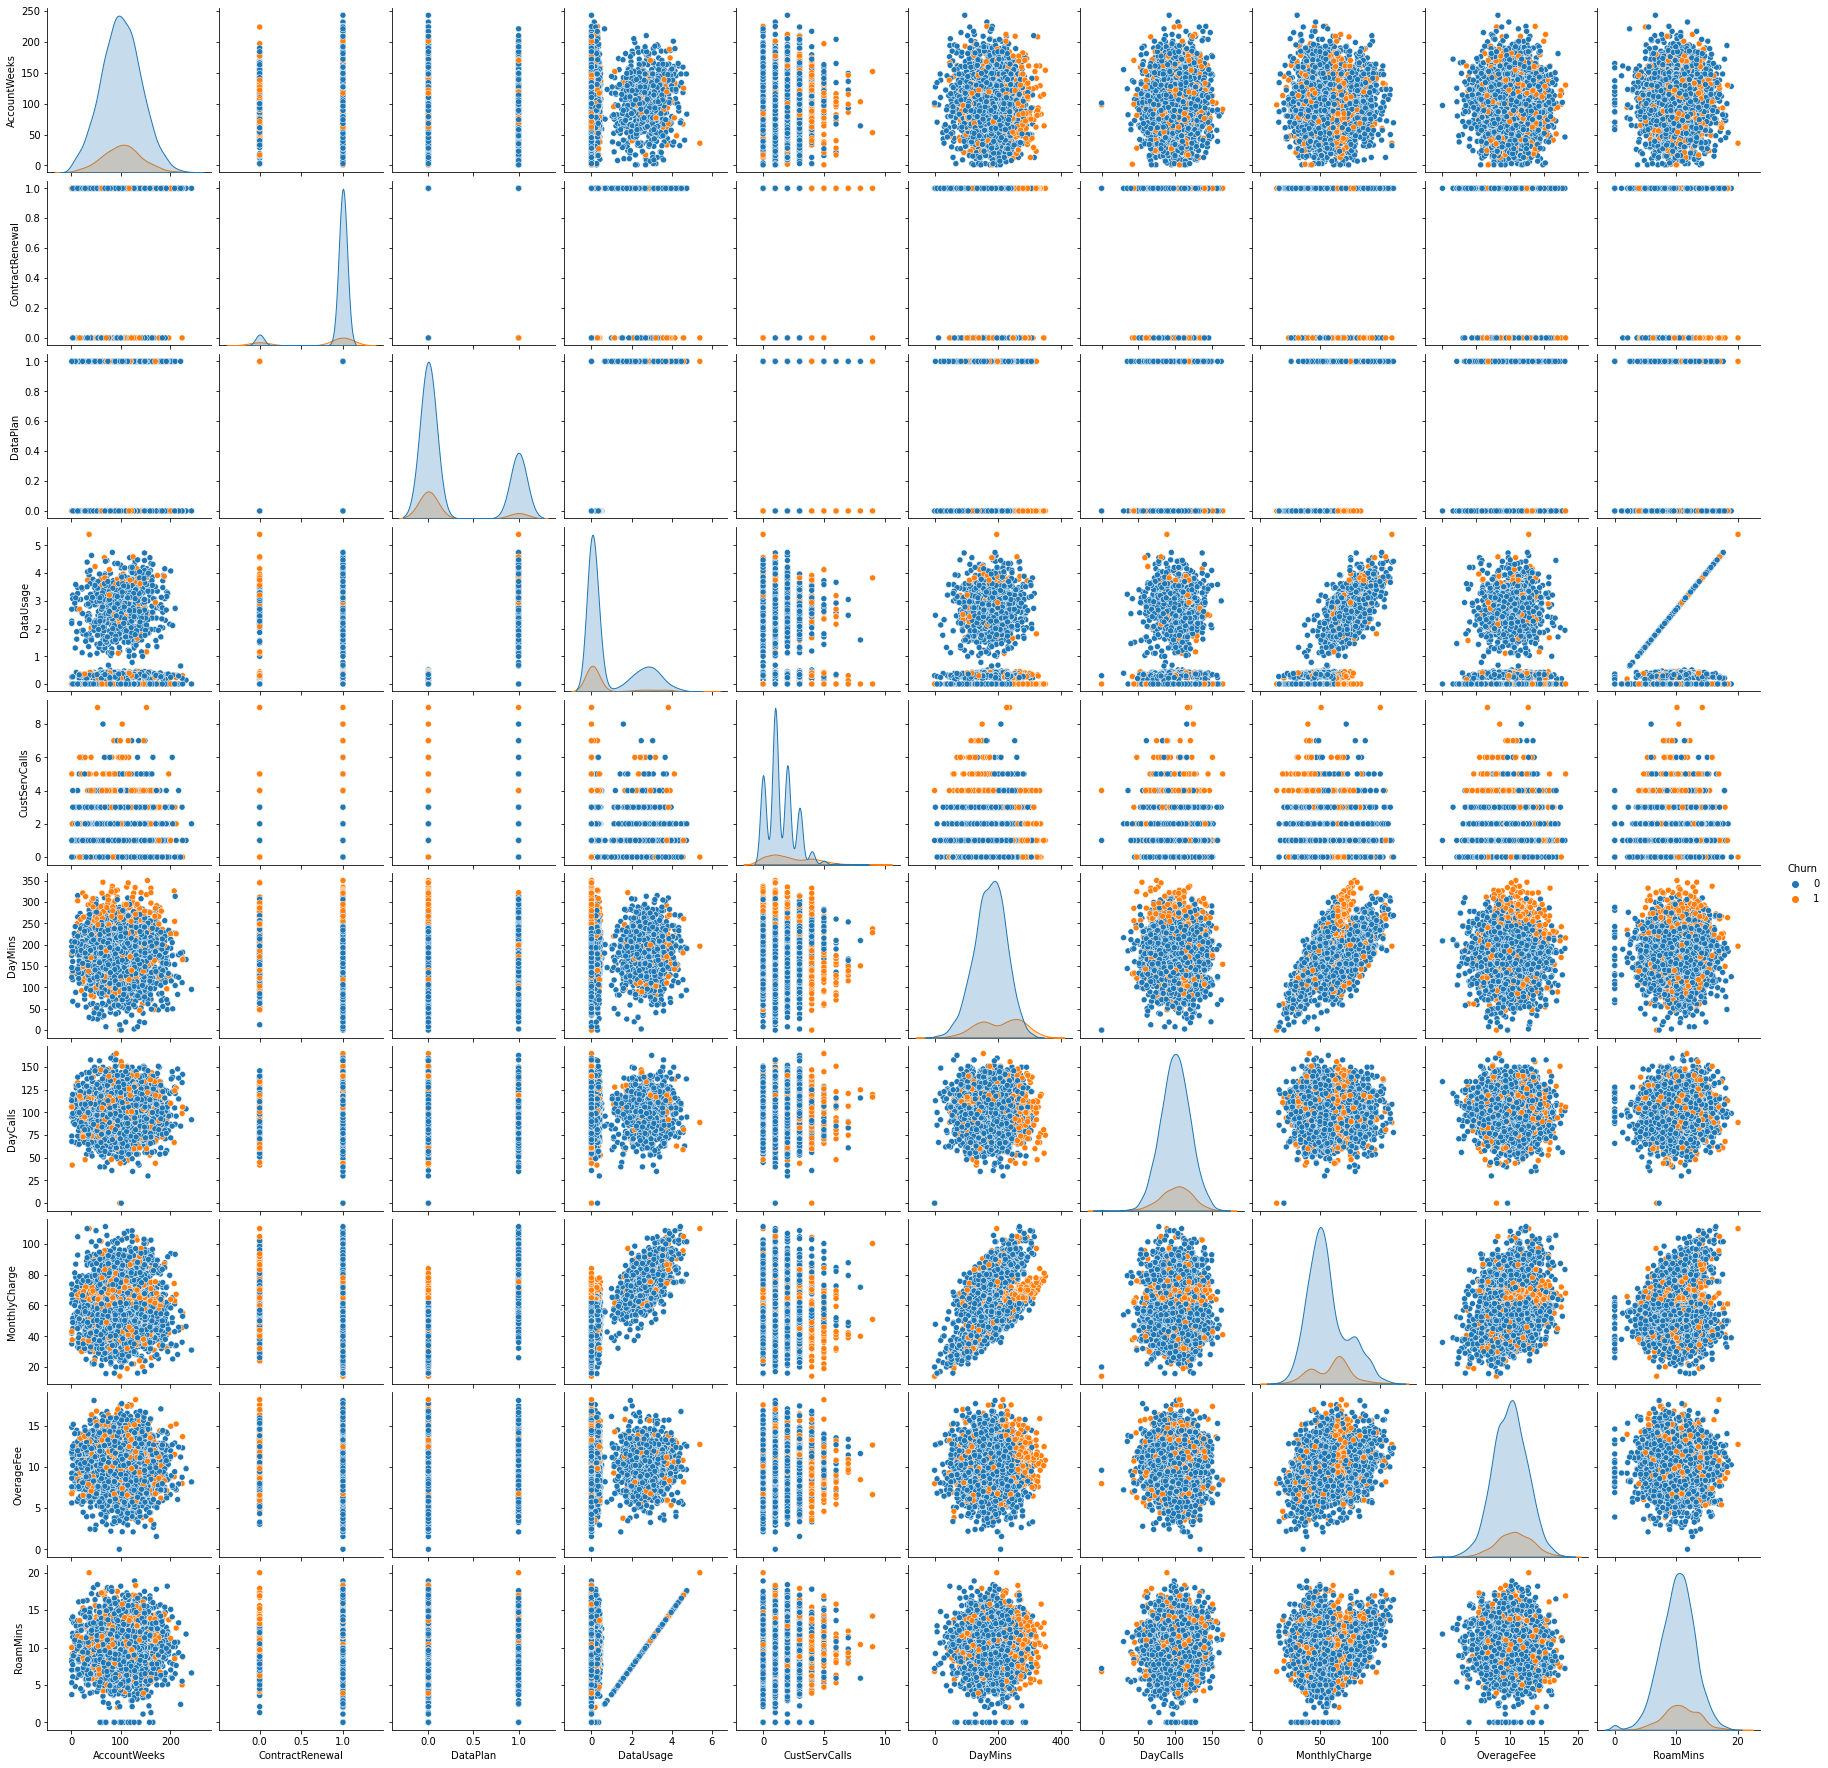

In [14]:
sn.pairplot(data=data,hue = "Churn")

<AxesSubplot:xlabel='DataUsage', ylabel='DayCalls'>

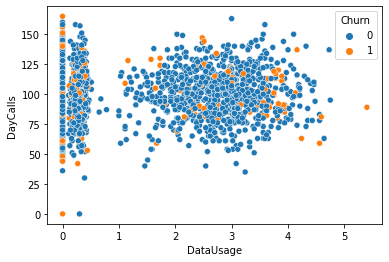

In [15]:
sn.scatterplot(data=data,x ="DataUsage",y ="DayCalls",hue ="Churn" )

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

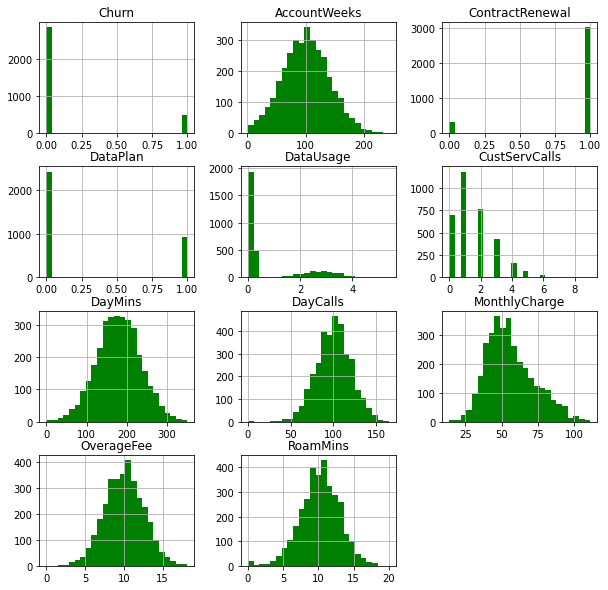

In [16]:
data.hist(figsize=(10,10),bins=25,color="g")

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

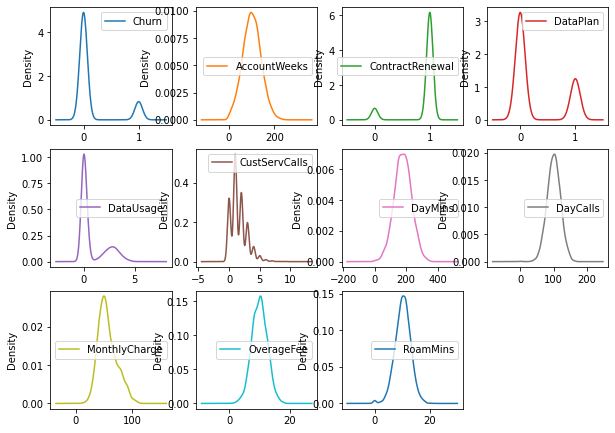

In [17]:
data.plot(kind="density", subplots=True, layout=(4,4), sharex=False,figsize = (10,10))

#### Conclusion :- From above graph , some varibles are normally distributed.

Churn                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
AccountWeeks        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
ContractRenewal     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
DataPlan            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
DataUsage             AxesSubplot(0.125,0.518913;0.168478x0.16413)
CustServCalls      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DayMins            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DayCalls           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MonthlyCharge         AxesSubplot(0.125,0.321957;0.168478x0.16413)
OverageFee         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
RoamMins           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

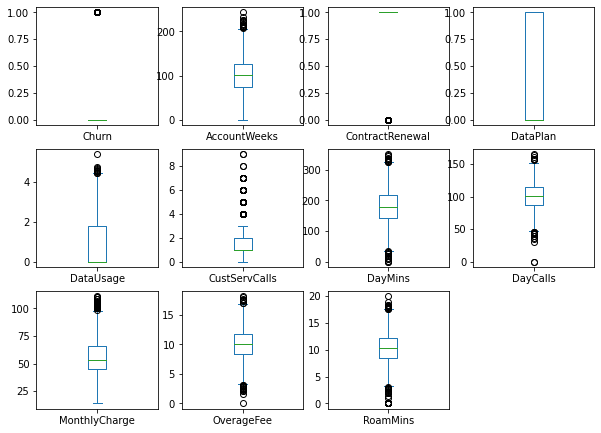

In [18]:
data.plot(kind = "box", subplots = True, layout = (4,4), sharex = False,figsize = (10,10))

#### Conclusion:- There are few outliers in each variable.

## Check whether the variable is normally distributed or not?

In [19]:
from scipy import stats
stats.shapiro(data)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7241822481155396, pvalue=0.0)

#### Conclusion :- Here our p value is 0.0 which is smaller than (0.05) so we reject null hypothesis . So our data is not Normally distributed.

## Normalization of data

In [20]:
yeojohn=p.PowerTransformer(method='yeo-johnson')
data_1 = yeojohn.fit(data)
data_1= yeojohn.transform(data)
data_1 = pd.DataFrame(data=data_1, columns=data.columns)
data_1
d=data_1.T[0]
d ## Here d is our normal data

Churn             -0.411672
AccountWeeks       0.684534
ContractRenewal    0.327580
DataPlan           1.617086
DataUsage          1.530860
CustServCalls     -0.257248
DayMins            1.570378
DayCalls           0.465553
MonthlyCharge      1.770550
OverageFee        -0.075852
RoamMins          -0.119700
Name: 0, dtype: float64

# Model Fitting

## Logistic Regression

In [21]:
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [22]:
X=data.drop("Churn",axis=1)
Y= data["Churn"]
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,stratify=Y,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train


array([[ 0.07362564,  0.32669806, -0.62378286, ..., -0.87506603,
         0.28493939, -1.88721441],
       [ 0.57285365,  0.32669806, -0.62378286, ..., -0.57056618,
         1.65429235,  0.38518349],
       [-0.67521636,  0.32669806, -0.62378286, ...,  0.16023345,
         0.43576667, -0.18291598],
       ...,
       [ 0.07362564,  0.32669806,  1.60312195, ...,  2.83374209,
         0.38813701,  1.09530784],
       [ 0.14850984,  0.32669806, -0.62378286, ..., -1.97126547,
        -1.84251912,  1.05980162],
       [-1.79847937,  0.32669806, -0.62378286, ..., -0.50966621,
        -0.65574656,  0.88227053]])

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)

0.8607442977190877

In [27]:
predictionlr = lr.predict(X_test)

In [28]:
lr.coef_

array([[ 0.02688698, -0.56833818, -0.3490475 , -0.22604464,  0.62856376,
         0.55419188,  0.01004123,  0.2205153 ,  0.31574728,  0.2309885 ]])

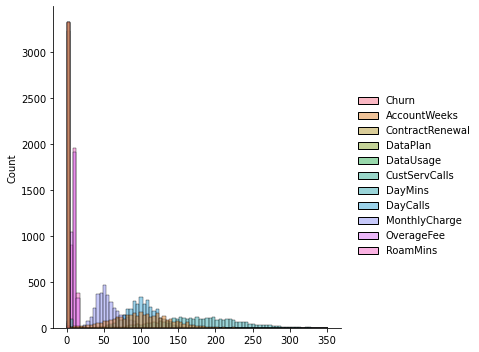

In [29]:
import seaborn as sn
sn.displot(data)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


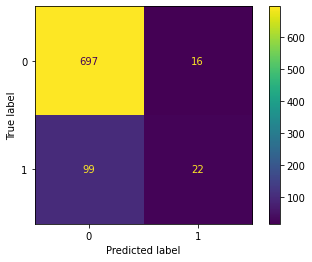

In [30]:
from sklearn import metrics
Ypred=lr.predict(X_test)
#tn,fp,fn,tp=metrics.confusion_matrix(Y_test,predictionlr).ravel()
metrics.plot_confusion_matrix(lr,X_test,Y_test)

In [31]:
print(metrics.classification_report(Y_test,predictionlr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       713
           1       0.58      0.18      0.28       121

    accuracy                           0.86       834
   macro avg       0.73      0.58      0.60       834
weighted avg       0.83      0.86      0.83       834



#### Conclusion :- In logistic regression model, from confusion matrix we can say that 115 obs are falsely predicted (in practical there are 16 customers who didn't canceled the service but by the model they cancle service and there are 99 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

## Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=20,validation_fraction=0.2,activation='logistic',
                random_state=2,solver='adam',n_iter_no_change=5,verbose=True,max_iter=500)
nn.fit(X_train, Y_train)

Iteration 1, loss = 0.75303307
Iteration 2, loss = 0.69322818
Iteration 3, loss = 0.64086624
Iteration 4, loss = 0.59585981
Iteration 5, loss = 0.55825714
Iteration 6, loss = 0.52669175
Iteration 7, loss = 0.50033188
Iteration 8, loss = 0.47863897
Iteration 9, loss = 0.46046199
Iteration 10, loss = 0.44526099
Iteration 11, loss = 0.43256117
Iteration 12, loss = 0.42193941
Iteration 13, loss = 0.41304424
Iteration 14, loss = 0.40550294
Iteration 15, loss = 0.39902555
Iteration 16, loss = 0.39335085
Iteration 17, loss = 0.38842240
Iteration 18, loss = 0.38411005
Iteration 19, loss = 0.38050944
Iteration 20, loss = 0.37703729
Iteration 21, loss = 0.37407854
Iteration 22, loss = 0.37133928
Iteration 23, loss = 0.36891419
Iteration 24, loss = 0.36663057
Iteration 25, loss = 0.36452816
Iteration 26, loss = 0.36262400
Iteration 27, loss = 0.36084668
Iteration 28, loss = 0.35913516
Iteration 29, loss = 0.35765315
Iteration 30, loss = 0.35608208
Iteration 31, loss = 0.35475467
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=20, max_iter=500,
              n_iter_no_change=5, random_state=2, validation_fraction=0.2,
              verbose=True)

In [33]:
nn.score(X_train, Y_train)

0.8591436574629852

In [34]:
predictionnn = nn.predict(X_test)

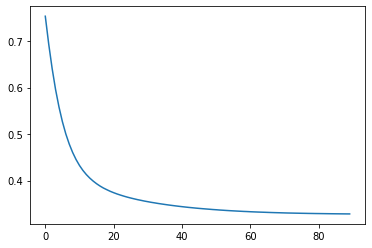

In [35]:
import matplotlib.pyplot as plt
plt.plot(nn.loss_curve_)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


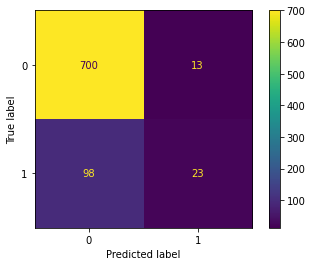

In [36]:
from sklearn import metrics
Ypred=lr.predict(X_test)
metrics.plot_confusion_matrix(nn,X_test,Y_test)

In [37]:
print(metrics.classification_report(Y_test,predictionnn))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       713
           1       0.64      0.19      0.29       121

    accuracy                           0.87       834
   macro avg       0.76      0.59      0.61       834
weighted avg       0.84      0.87      0.83       834



#### Conclusion:-  In neural network model, from confusion matrix we can say that 111 obs are falsely predicted (in practical there are 13 customers who didn't canceled the service but by the model they cancle service and there are 98 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

# Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

1.0

In [39]:
predictionrf = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       713
           1       0.92      0.72      0.81       121

    accuracy                           0.95       834
   macro avg       0.93      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


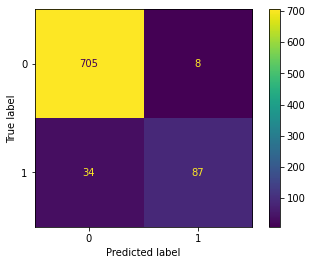

In [40]:
print(classification_report(Y_test, predictionrf))
plot_confusion_matrix(rf, X_test, Y_test)  

#### Conclusion:-  In random forest classifier model, from confusion matrix we can say that 42 obs are falsely predicted (in practical there are 8 customers who didn't canceled the service but by the model they cancle service and there are 34 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

# KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN.fit(X_train, Y_train)
KNN.score(X_train, Y_train)

1.0

In [42]:
predictionknn = KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       713
           1       0.81      0.49      0.61       121

    accuracy                           0.91       834
   macro avg       0.86      0.73      0.78       834
weighted avg       0.90      0.91      0.90       834



C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


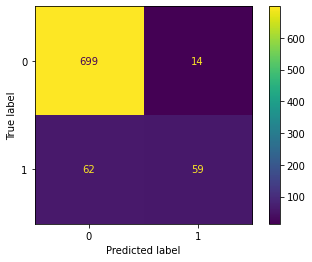

In [43]:
print(classification_report(Y_test, predictionknn))
plot_confusion_matrix(KNN, X_test, Y_test) 

#### Conclusion:-  In KNN model, from confusion matrix we can say that 76 obs are falsely predicted (in practical there are 14 customers who didn't canceled the service but by the model they cancle service and there are 62 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

# Cross validation

## K - fold for logistic regression

In [44]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
acc=[]
lr=LogisticRegression(random_state=0,max_iter=500)
for i,j in kf.split(X.values):
    X_train,X_test=X.values[i],X.values[j]
    Y_train,Y_test=Y[i],Y[j]
    lr.fit(X_train,Y_train)
    acc.append(lr.score(X_test,Y_test)) 

In [45]:
acc

[0.8811881188118812, 0.8568856885688569, 0.8433843384338434]

In [46]:
import numpy as np
np.mean(acc)

0.8604860486048606

## K- fold for Neural Network

In [47]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
acc=[]
nn=MLPClassifier()
for i,j in kf.split(X.values):
    X_train,X_test=X.values[i],X.values[j]
    Y_train,Y_test=Y[i],Y[j]
    nn.fit(X_train,Y_train)
    acc.append(nn.score(X_test,Y_test))

In [48]:
acc

[0.8640864086408641, 0.8532853285328533, 0.8406840684068407]

In [49]:
import numpy as np
np.mean(acc)

0.8526852685268528

## K-fold for random forest

In [51]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
acc=[]
rf = RandomForestClassifier()
for i,j in kf.split(X.values):
    X_train,X_test=X.values[i],X.values[j]
    Y_train,Y_test=Y[i],Y[j]
    rf.fit(X_train,Y_train)
    acc.append(rf.score(X_test,Y_test))

In [52]:
acc

[0.9351935193519352, 0.9351935193519352, 0.9324932493249325]

In [53]:
import numpy as np
np.mean(acc)

0.9342934293429342

## K - fold for KNN

In [54]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
acc=[]
KNN=KNeighborsClassifier()
for i,j in kf.split(X.values):
    X_train,X_test=X.values[i],X.values[j]
    Y_train,Y_test=Y[i],Y[j]
    KNN.fit(X_train,Y_train)
    
    acc.append(KNN.score(X_test,Y_test))

In [55]:
acc

[0.8793879387938794, 0.8703870387038704, 0.8658865886588659]

In [56]:
import numpy as np
np.mean(acc)

0.8718871887188718

### Conclusion : All the above models are good fitted for our data. 